<a href="https://colab.research.google.com/github/maryamxasghari/Computer_Vision/blob/main/YoloV5_Score_board_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img width="130" height="80" src="https://upload.wikimedia.org/wikipedia/commons/3/31/Boston_University_wordmark.svg">
</p>

<h5 align="center">CS673 Software Engineering Term Project</h5>
<h6 align="center">Fall 2021</h6>

<h1 align="center">GameOver</h1>
<h2 align="center">Sport scoring notification system</h2>

# Overview
This Notebook is to show you how to using YOLOv5 for detection using  our saved weights 

# Requierments 

download and save following files in your local drive from [YOLOv5](https://drive.google.com/drive/folders/1EhP4ykGtdngrI7dxF5vBMFlFA4lhsd6j?usp=sharing) folder in drive. 

**Note** For easy access you can create yolov5 folder in your drive and save everything there

#### Config files
* custom_yolov5s.yaml
* data.yaml

#### Weights
* best.pt 
* best2.pt 

#### A few images to test 
* image422.jpg 
* image73.jpg
* image347.jpg 



## Mount your drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

## Clone the YOLOv5 repository Install Dependencies



In [ ]:
# clone YOLOv5 repository

!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 9473, done.
remote: Total 9473 (delta 0), reused 0 (delta 0), pack-reused 9473
Receiving objects: 100% (9473/9473), 9.92 MiB | 28.29 MiB/s, done.
Resolving deltas: 100% (6583/6583), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 636 kB 6.1 MB/s 
Setup complete. Using torch 1.9.0+cu102 CPU


### If you check all the files are here and ready to use

In [ ]:
%ls

data/       hubconf.py  README.md*         train.py        weights/
detect.py   LICENSE     requirements.txt*  tutorial.ipynb
Dockerfile  models/     test.py            utils/


## Copy the files from your drive to cloud

In [ ]:
!cp /mydrive/yolov5/custom_yolov5s.yaml ./
!cp /mydrive/yolov5/data.yaml ./ 

In [ ]:
%cat custom_yolov5s.yaml

# parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3

In [ ]:
%cat ./data.yaml

train: ./train/images
val: ./valid/images

nc: 1
names: ['score']


In [ ]:
!cp /mydrive/yolov5/best.pt ./
!cp /mydrive/yolov5/best2.pt ./ 

In [ ]:
%ls

best2.pt             data.yaml   LICENSE            test.py         weights/
best.pt              detect.py   models/            train.py
custom_yolov5s.yaml  Dockerfile  README.md*         tutorial.ipynb
data/                hubconf.py  requirements.txt*  utils/


### Create a test folder for you images in the cloud

In [ ]:
%mkdir ./test

In [ ]:
!cp /mydrive/yolov5/image422.jpg ./test
!cp /mydrive/yolov5/image73.jpg ./test
!cp /mydrive/yolov5/image347.jpg ./test

# Run the code to detect the scoring board :) 

* path to weight : ./best.pt 
* path to the folder that has the images you want to test : ./test  
* using --save-txt to save the cordinates of the detected box 
* 'results' is the folder name that the model will save the results in it 

In [ ]:
!python detect.py --weights ./best.pt --img 416 --conf 0.4 --source ./test --save-txt --name 'results' 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='results', project='runs/detect', save_conf=False, save_txt=True, source='./test', update=False, view_img=False, weights=['./best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/3 /content/yolov5/test/image347.jpg: 256x416 1 score, Done. (0.200s)
image 2/3 /content/yolov5/test/image422.jpg: 256x416 1 score, Done. (0.123s)
image 3/3 /content/yolov5/test/

### labels for all 3 images are saved in a subfolder of 'results' folder that we gave


In [ ]:
%ls ./runs/detect/results/labels

image347.txt  image422.txt  image73.txt


 Here is how the txt files look like

In [ ]:
%cat ./runs/detect/results/labels/image347.txt

0 0.164844 0.0888889 0.25625 0.0555556


## Save the results 
Run the following line to save the results of the detection in your local drive 

In [ ]:
%cp -r ./runs/detect/results /mydrive/yolov5/

## Display the results
You can also display inference on ALL test images in colab

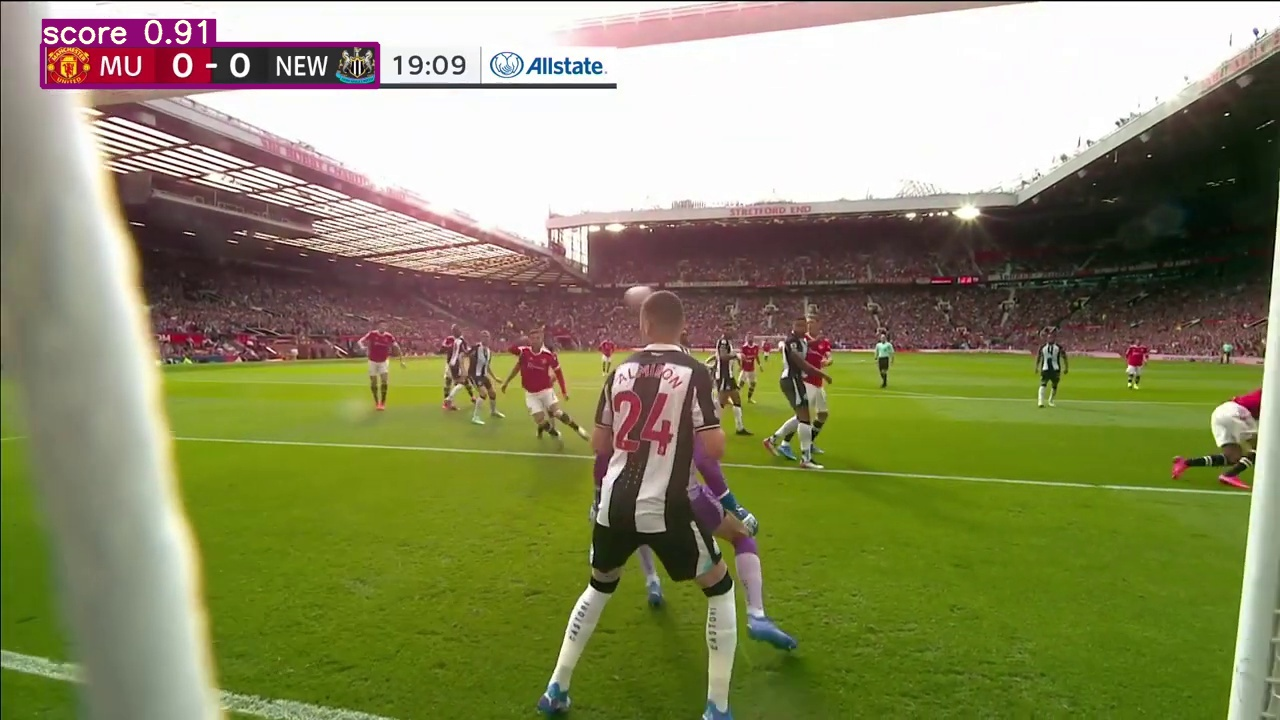

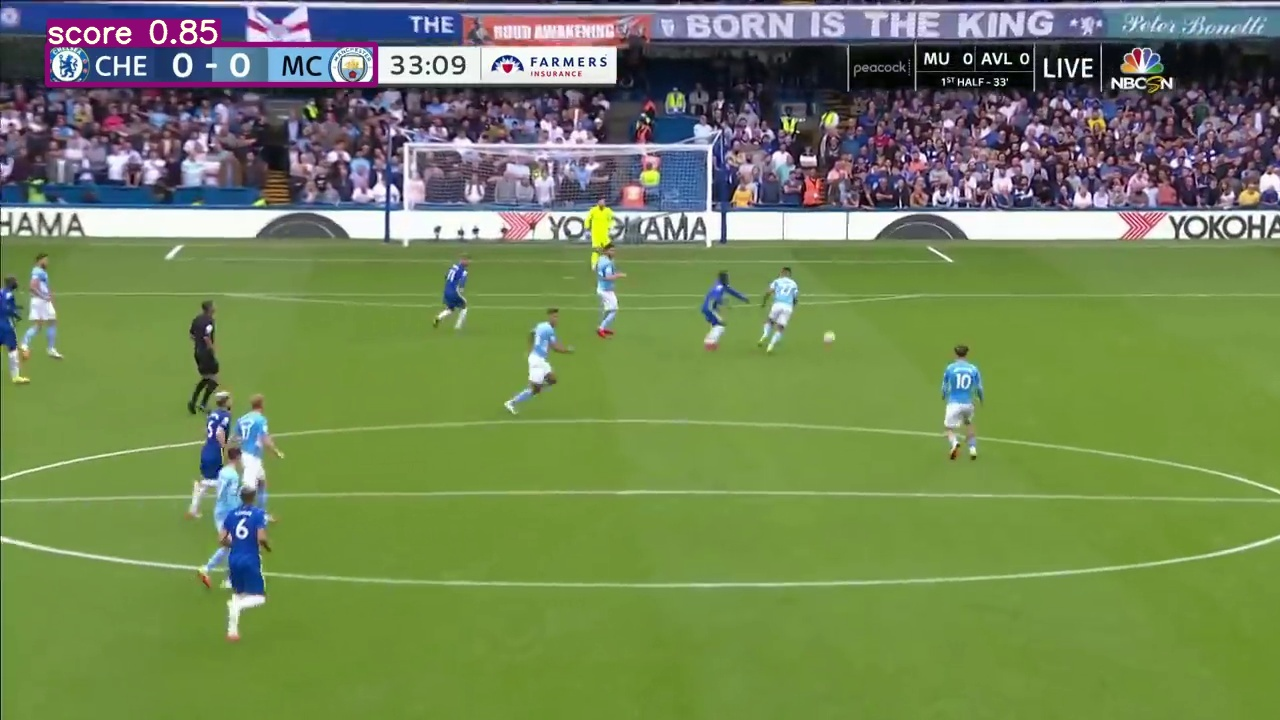

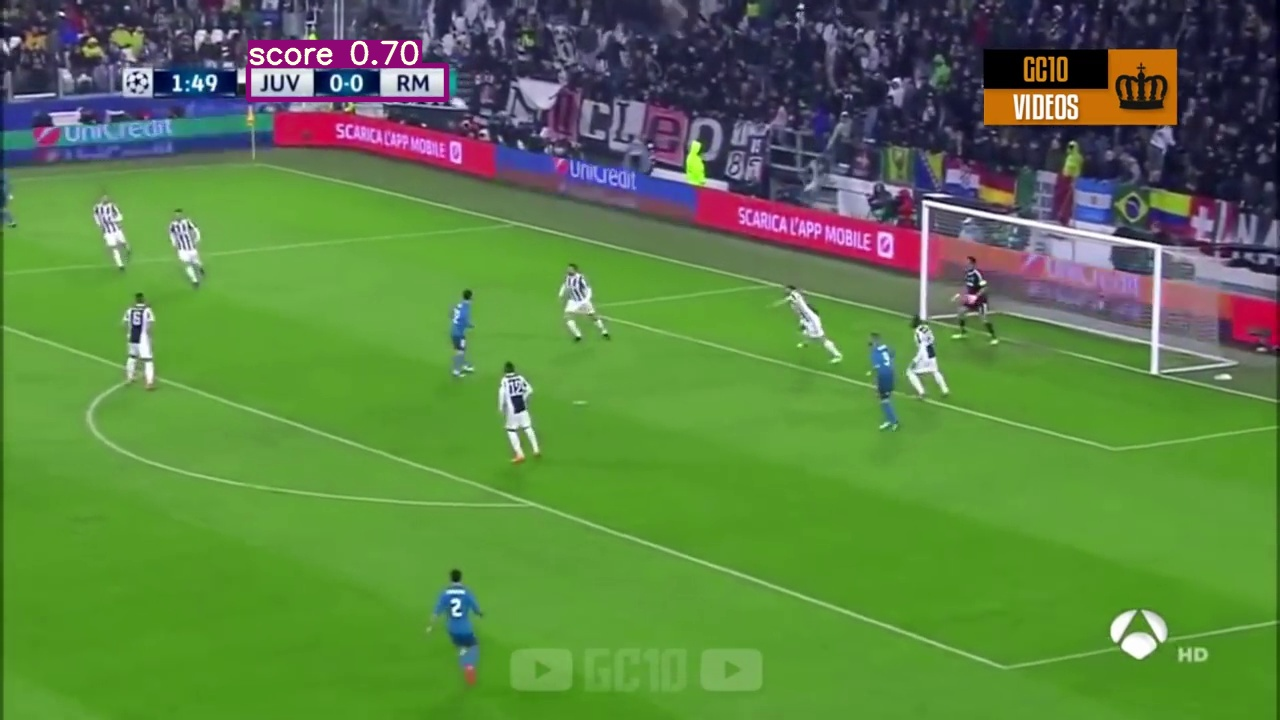

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('./runs/detect/results/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")

## Using our 2nd weight to detect the entire box including time and ...

In [ ]:
!python detect.py --weights ./best2.pt --img 416 --conf 0.4 --source ./test --save-txt --name 'results2' 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='results2', project='runs/detect', save_conf=False, save_txt=True, source='./test', update=False, view_img=False, weights=['./best2.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/3 /content/yolov5/test/image347.jpg: 256x416 1 score-box, Done. (0.130s)
image 2/3 /content/yolov5/test/image422.jpg: 256x416 1 score-box, Done. (0.133s)
image 3/3 /content/yo

## Save the results in your drive

In [ ]:
%cp -r ./runs/detect/results2 /mydrive/yolov5/

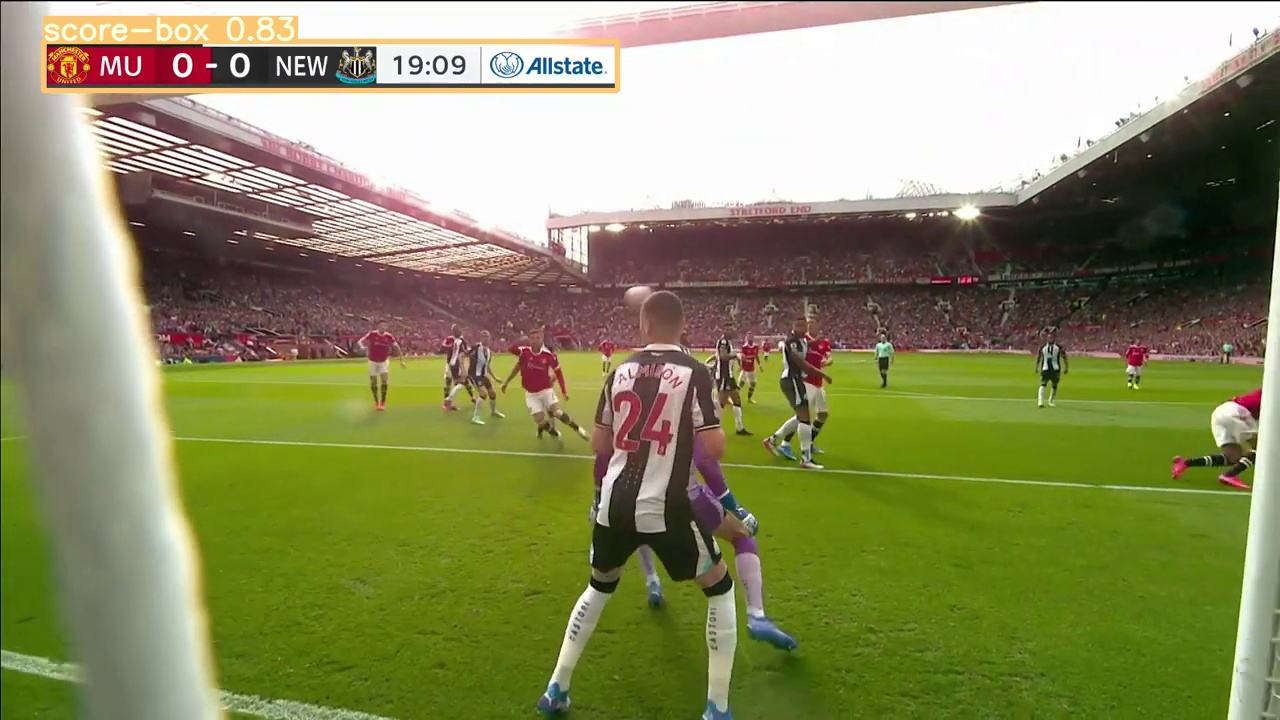

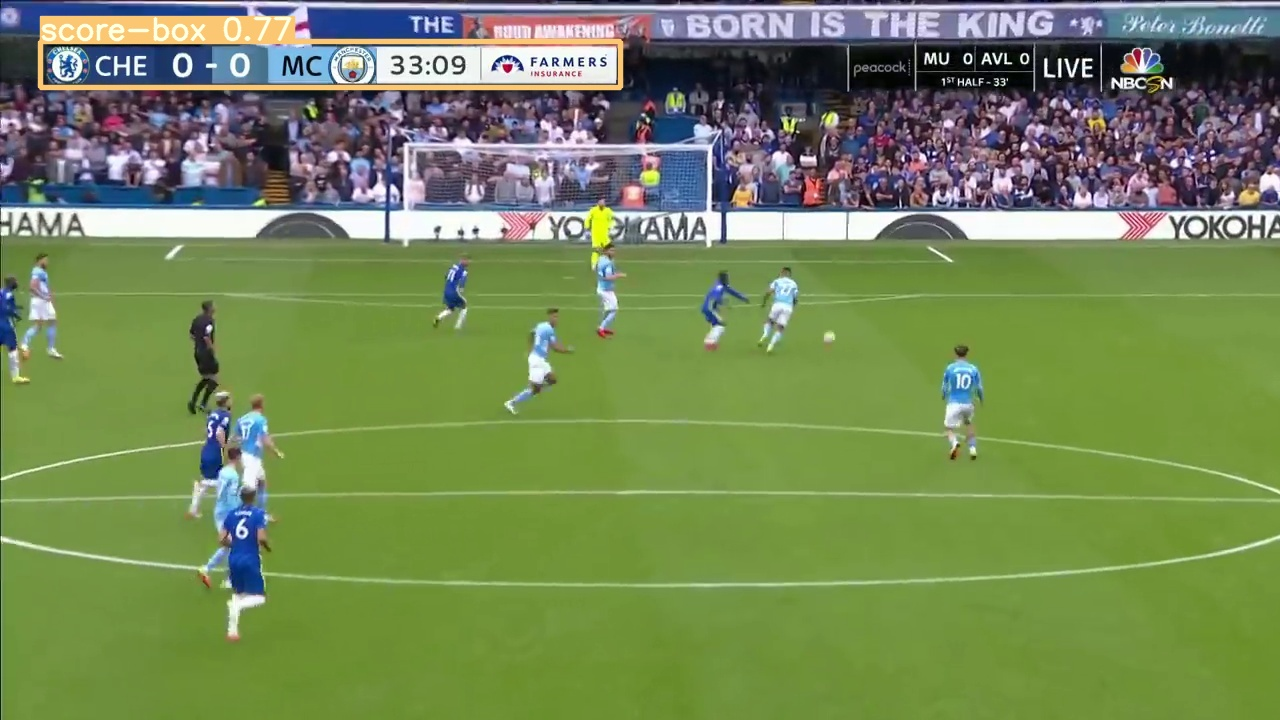

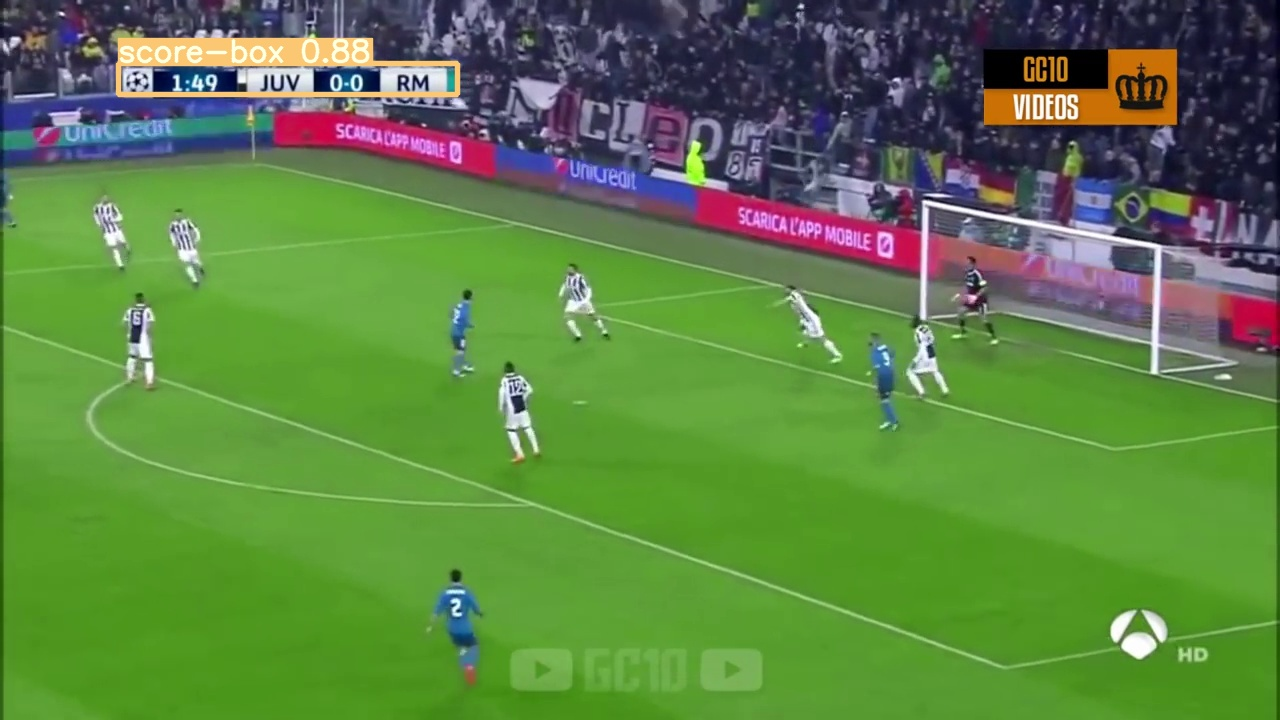

In [ ]:
for imageName in glob.glob('./runs/detect/results2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Crop the box
Now lets write a function to use the txt file in the results folder to crop the box for us and save it to our local drive

In [ ]:
import cv2

def cropImg(img_name):
  img = cv2.imread(f'./test/{img_name}.jpg')
  image_height ,image_width,_ = img.shape

  with open(f"./runs/detect/results/labels/{img_name}.txt") as f:
    lines = f.read().splitlines()

  for line in lines:
    cor = line.split()
    x_center =  float(cor[1])* image_width
    y_center = float(cor[2]) * image_height
    width = float(cor[3]) * image_width
    height = float(cor[4]) * image_height

    x_left = x_center - (width /2)
    y_top = y_center - (height /2)

  crop_img = img[ int(y_top):int(y_top+height), int(x_left):int(x_left+width) ]
  cv2.imwrite(f'/mydrive/yolov5/coped_{img_name}.png', crop_img)
  display(Image(f'/mydrive/yolov5/coped_{img_name}.png'))


In [ ]:
%ls ./test/

image347.jpg  image422.jpg  image73.jpg


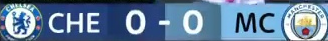

In [ ]:
cropImg(img_name= 'image347' )

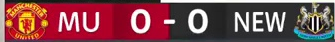

In [ ]:
cropImg(img_name= 'image422' )

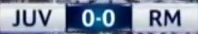

In [ ]:
cropImg(img_name= 'image73' )

# Read the characters
Testing tesseract-ocr to read the characters 

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract

def ocr_core(img):
  text = pytesseract.image_to_string(img)
  return text

ocr_core('/mydrive/yolov5/coped_image73.png')


'JUV EO RM\n\x0c'

In [ ]:
ocr_core('/mydrive/yolov5/coped_image422.png')

'EVO 0 eM OT eis\n\n \n\x0c'

In [ ]:
img = cv2.imread('/mydrive/yolov5/coped_image73.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(img_gray,5)
thresh = cv2.adaptiveThreshold(img_blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)[1]

ocr_core(img_blur)

'JUV RM\n\x0c'

### we need to work on this task ...






